## CSE330 Lab: Polynomial Interpolation using Lagrange form
---

###1. Importing necessary libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt

###2. Writing the LagrangePolynomial class

i) The constructor `__init__` has been written for you. 
    
  * Here, we check whether the input vectors (numpy arrays) are equal or not. 
  * We store `data_x` and `data_y`
  * We calculate and store the degree of the polynomial.

ii) The `__repr__` function has been written for you. 

* This is similar to the toString() method in Java. This returns a formatted string of the object whenever the object is printed.


**iii) You have to write the `__call__` function.** 

* This function makes an object of a class callable.
* The function calculates the lagrange polynomial from a set of given nodes. `self.x` and `self.y` contains the coordinates of the given nodes of the original function. You have to use `self.x` and `self.y` in equations $1$ and $2$ below to find the interpolated output of the polynomial for all elements of `x`.
`x` is a numpy array containing points through which we want to plot our polynomial. 



General form for a $n$ degree Lagrange polynomial:

\begin{equation}
p_n(x) = \sum_{k=0}^{n} f(x_k)l_k(x)\tag{1}
\end{equation}

where,
\begin{equation}
l_k(x) = \prod_{j=0, j\neq k}^{n} \frac{x-x_j}{x_k-x_j} \tag{2}
\end{equation}

Note that the Lagrange method is more efficient than the matrix method since we do not need to calculate any inverse matrices.


In [5]:
class LagrangePolynomial:
    def __init__(self, data_x, data_y):

        assert len(data_x) == len(data_y)
        
        self.x = data_x
        self.y = data_y
        self.degree = len(data_x) - 1

    def __repr__(self):
        strL = f"LagrangePolynomial of order {self.degree}\n"
        strL += "p(x) = "
        for i in range(self.y):
            if y == 0:
                continue
            elif y >= 0:
                strL += f"+ {y}*l_{i+1}(x) "
            else:
                strL += f"- {-y}*l_{i+1}(x) "

        return strL

    def __call__(self, x):
        y_interp  = np.zeros(len(x))
        
##correct output with 2 loop used here         

#         for k in range(len(x)):        
#             for i,j in zip(self.x, self.y):             
#                 y_interp[k] += j * np.prod((x[k] - self.x[self.x != i])/(i-self.x[self.x != i]))

        length = len(self.x) * len(x)        
        i,j,k = 0,0,0
        
        for a in range(length):
            
            if (i == len(self.x)):
                i,j = 0,0
                k += 1
                
            if (k == len(x)):
                break
                
            y_interp[k] += self.y[j] * np.prod((x[k] - self.x[self.x != self.x[i]])/(self.x[i] - self.x[self.x != self.x[i]]))

            i += 1
            j += 1

        return y_interp
 

###3. Calling the `LagrangePolynomial` object and plotting the polynomial.

First we create a lagrange polynomial object, `p` by calling `LagrangePolynomial(data_x, data_y)`. Then, we call the object as a function (which is possible because we had implemented a `__call__` function in the `LagrangePolynomial` class) and pass in `x`. `x` is 1D numpy array (a vector) which we created using `linspace` function and contains $x_i$, i.e. the points through which we want to plot our polynomial. Calling the object as a function and inputting `x` returns the corresponding $y_i$ values and stores them in the `y_interp` numpy array. 

Finally, the polynomial is plotted by passing in $x$ and $y_{interp}$ in `plt.plot()`, i.e. the $x_i$ and $y_i$ pairs. 

Note that in the plot the given nodes will be marked in red.

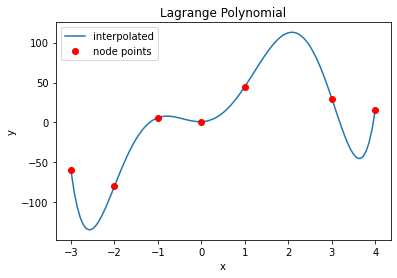

In [6]:
data_x = np.array([-3.,-2.,-1.,0.,1.,3.,4.])
data_y = np.array([-60.,-80.,6.,1.,45.,30.,16.])

p = LagrangePolynomial(data_x, data_y)

x = np.linspace(-3, 4, 100) 
y_interp = p(x)

plt.plot(x, y_interp)
plt.plot(data_x, data_y, 'ro')
plt.legend(['interpolated', 'node points'], loc = 'upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Polynomial')

plt.show()